<a href="https://colab.research.google.com/github/LukasPurbaW/100_Days_of_Deep_Learning/blob/main/Day_3_Learning_Rate_%26_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code originally from https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['ggplot'])

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

## Dummy Data

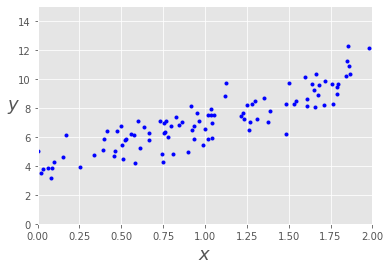

In [2]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

## Gradient Descent

In [ ]:
# Gradient descent is a process where the algorithm try to reach closest value to the actual data.
# This is how neural network learns, their weight will be adjusted from the decision whether the predicted data is going closer to the actual data or not.

In [6]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [7]:
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [10]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

In [9]:
def plot_GD(n_iter,lr,ax,ax1=None):
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

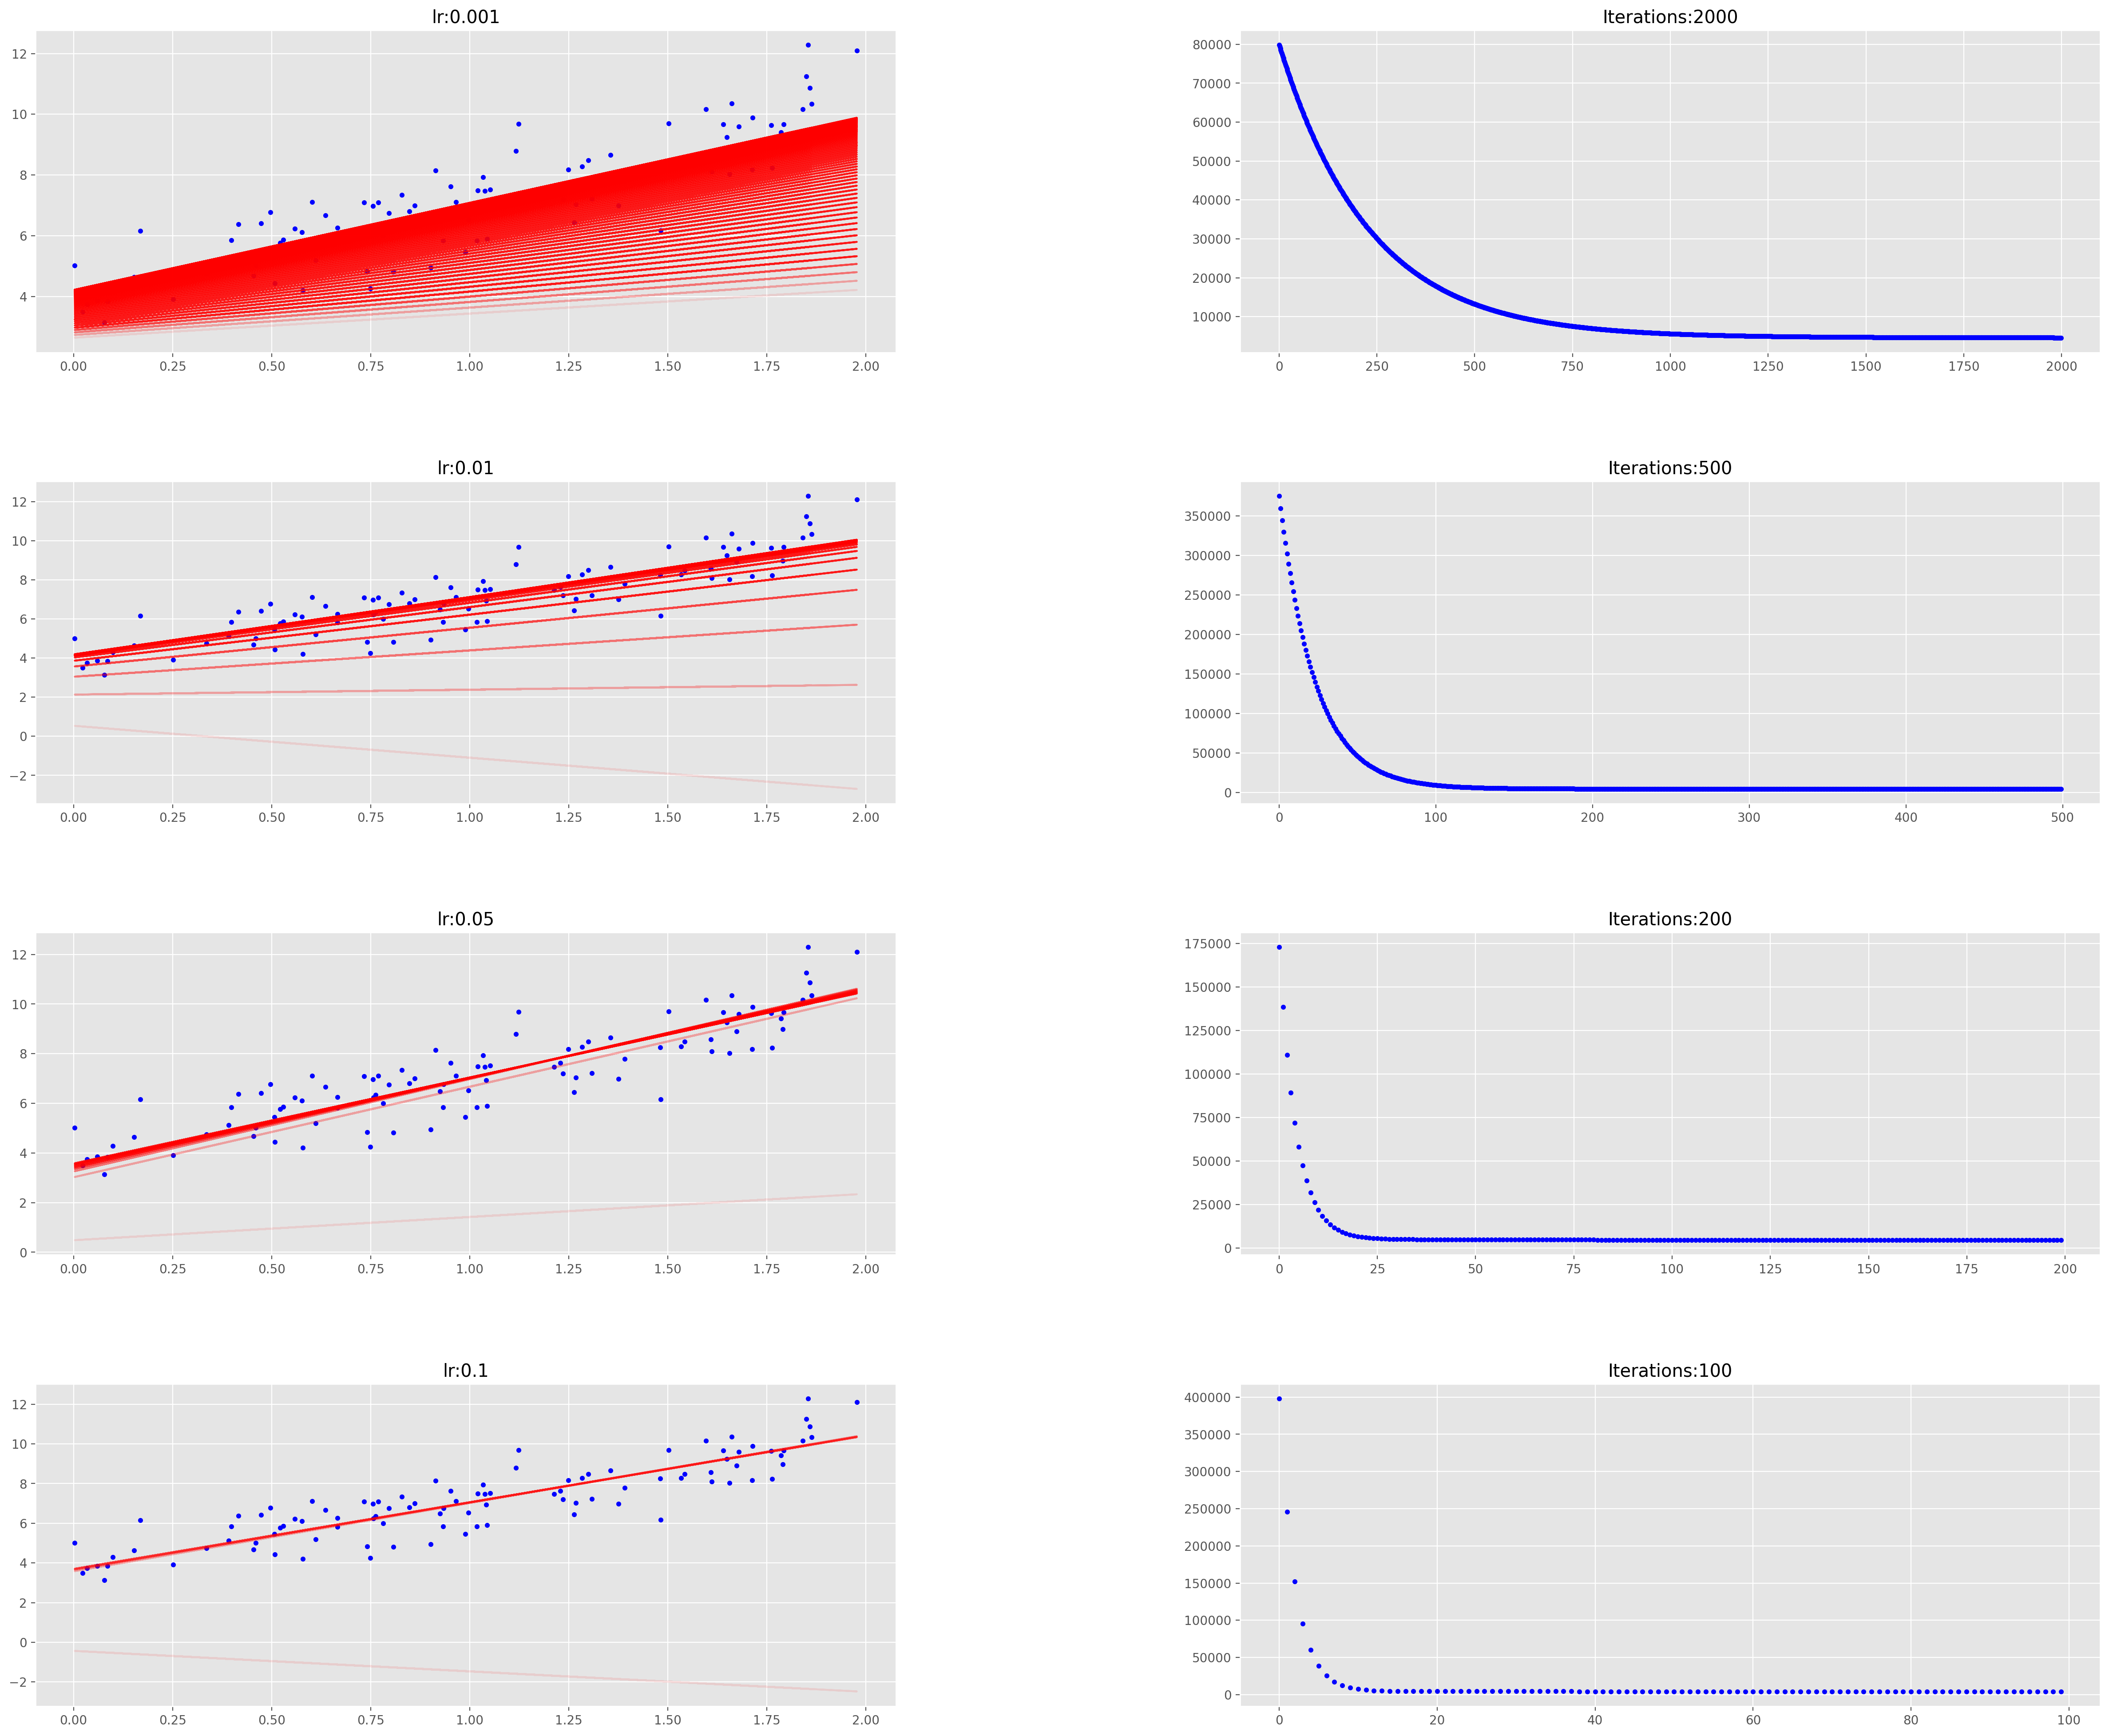

In [11]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [ ]:
## Here observe the graph, you can see the effect of learning rate and gradient descent graph on the right sides.
## The minimum value on gradient descent means that it has reach the optimal state where the model fit the data.
## Higher learning rate makes the learning process faster, but it more complicated data such as image, it could gives you disadvantage. 